<a href="https://colab.research.google.com/github/JorgeAnsotegui/TFM/blob/main/Metricas/MetricasLast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [4]:
# Conectar Colab a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import zipfile

# Función para crear carpetas si no existen
def create_directories_if_not_exist(*directories):
    for directory in directories:
        os.makedirs(directory, exist_ok=True)

# Ruta al archivo ZIP y la ruta de destino
zip_file_path = '/content/drive/MyDrive/TFM/models/YoloV8_250Epoch_V1.zip'
output_directory = '/content/models/'

# Crear el directorio de salida si no existe
create_directories_if_not_exist(output_directory)

# Descomprimir el archivo ZIP en el directorio de salida
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

print(f"Archivo descomprimido en: {output_directory}")


Archivo descomprimido en: /content/models/


In [6]:
import shutil
import os

# Función para borrar directorios, incluso si tienen contenido
def delete_directory(directory):
    if os.path.exists(directory):
        shutil.rmtree(directory)
        print(f"Directorio '{directory}' ha sido eliminado.")
    else:
        print(f"El directorio '{directory}' no existe.")

# Especifica la ruta del directorio que quieres borrar
directory_to_delete = '/content/models/YoloV8_250Epoch_V1/trial_03'

# Llamada a la función para borrar el directorio
delete_directory(directory_to_delete)


Directorio '/content/models/YoloV8_250Epoch_V1/trial_03' ha sido eliminado.


In [7]:
import pandas as pd

# Ruta al archivo CSV
csv_file_path = '/content/models/YoloV8_250Epoch_V1/trial_1/results.csv'

# Leer el archivo CSV
df = pd.read_csv(csv_file_path)

# Imprimir los nombres de las columnas
print("Nombres de las columnas en el archivo CSV:")
print(df.columns.tolist())


Nombres de las columnas en el archivo CSV:
['                  epoch', '         train/box_loss', '         train/seg_loss', '         train/cls_loss', '         train/dfl_loss', '   metrics/precision(B)', '      metrics/recall(B)', '       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '   metrics/precision(M)', '      metrics/recall(M)', '       metrics/mAP50(M)', '    metrics/mAP50-95(M)', '           val/box_loss', '           val/seg_loss', '           val/cls_loss', '           val/dfl_loss', '                 lr/pg0', '                 lr/pg1', '                 lr/pg2']


Columnas en '/content/models/YoloV8_250Epoch_V1/trial_37/results.csv': ['epoch', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)', 'val/box_loss', 'val/seg_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
Columnas en '/content/models/YoloV8_250Epoch_V1/trial_28/results.csv': ['epoch', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)', 'val/box_loss', 'val/seg_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
Columnas en '/content/models/YoloV8_250Epoch_V1/trial_9/results.csv': ['epoch', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'm

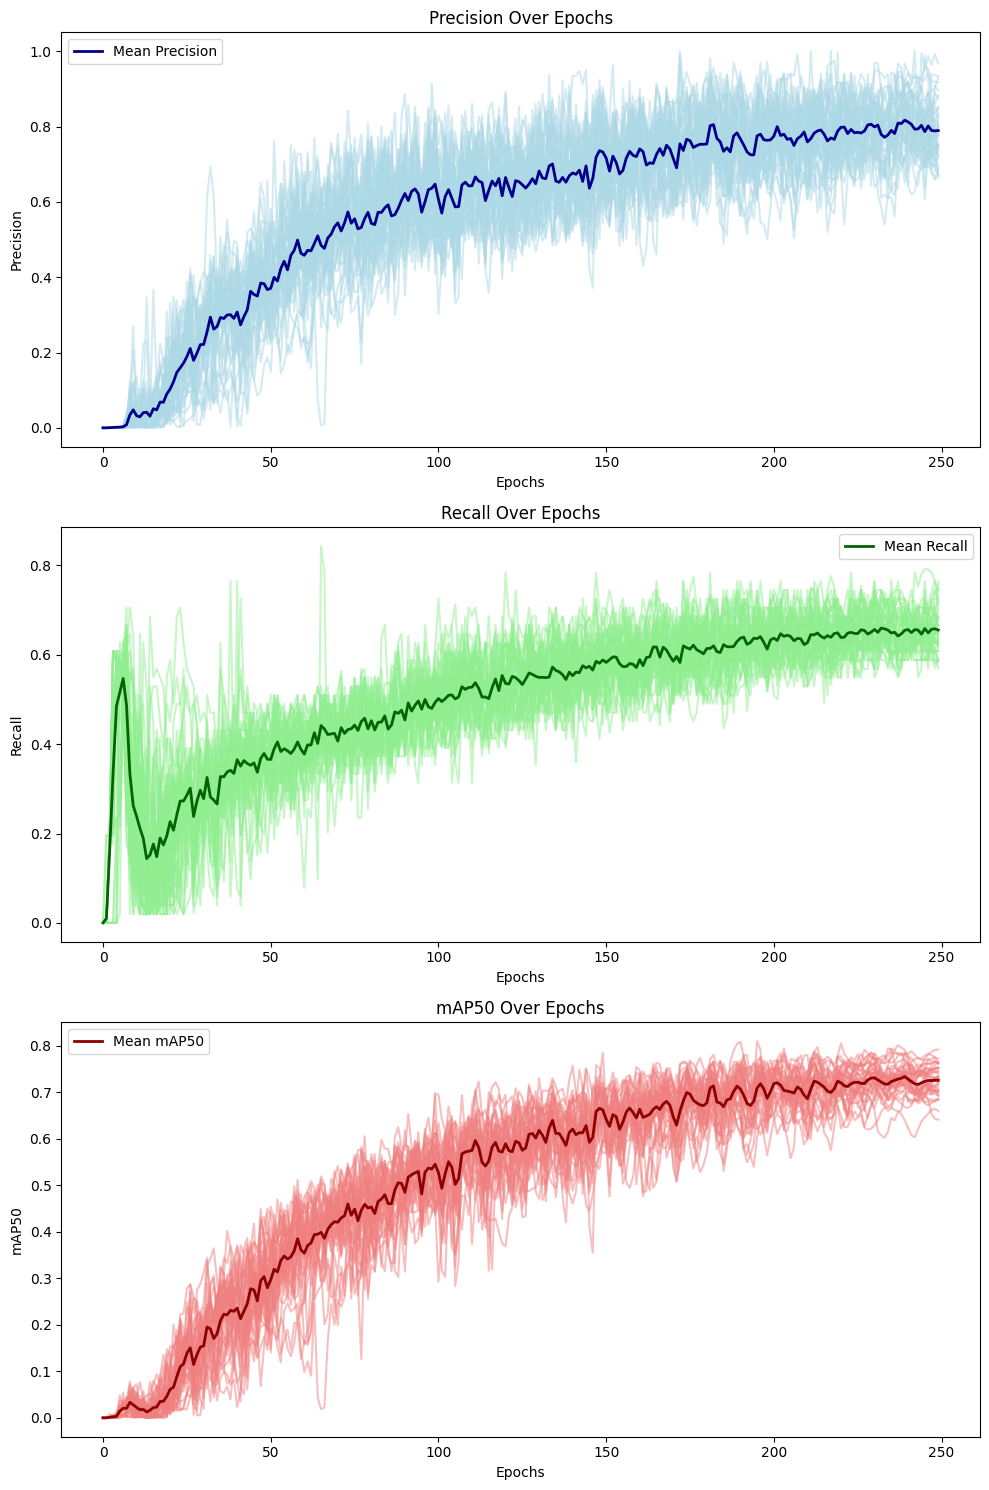

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

def clean_column_names(df):
    # Eliminar espacios en blanco al inicio y al final de los nombres de las columnas
    df.columns = df.columns.str.strip()
    return df

def plot_metrics_from_trials(base_directory):
    # Listar todas las carpetas de trials
    trial_folders = glob.glob(os.path.join(base_directory, 'trial_*'))

    # Inicializar listas para almacenar los datos de todas las métricas
    precision_data = []
    recall_data = []
    map50_data = []

    # Recorrer cada carpeta de trial
    for folder in trial_folders:
        results_file = os.path.join(folder, 'results.csv')
        if os.path.exists(results_file):
            # Leer el archivo CSV
            df = pd.read_csv(results_file)

            # Limpiar nombres de columnas
            df = clean_column_names(df)

            # Imprimir los nombres de las columnas para depuración
            print(f"Columnas en '{results_file}': {df.columns.tolist()}")

            # Intentar guardar las columnas de interés
            try:
                precision_data.append(df['metrics/precision(M)'].values)
                recall_data.append(df['metrics/recall(M)'].values)
                map50_data.append(df['metrics/mAP50(M)'].values)
            except KeyError as e:
                print(f"Columna no encontrada: {e}")

    # Convertir listas a DataFrames para facilitar el cálculo de la media
    precision_df = pd.DataFrame(precision_data).transpose()
    recall_df = pd.DataFrame(recall_data).transpose()
    map50_df = pd.DataFrame(map50_data).transpose()

    # Calcular las medias
    precision_mean = precision_df.mean(axis=1)
    recall_mean = recall_df.mean(axis=1)
    map50_mean = map50_df.mean(axis=1)

    # Plotear las métricas
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plot Precision
    for trial_data in precision_data:
        axs[0].plot(trial_data, color='lightblue', alpha=0.5)
    axs[0].plot(precision_mean, color='darkblue', label='Mean Precision', linewidth=2)
    axs[0].set_title('Precision Over Epochs')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Precision')
    axs[0].legend()

    # Plot Recall
    for trial_data in recall_data:
        axs[1].plot(trial_data, color='lightgreen', alpha=0.5)
    axs[1].plot(recall_mean, color='darkgreen', label='Mean Recall', linewidth=2)
    axs[1].set_title('Recall Over Epochs')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Recall')
    axs[1].legend()

    # Plot mAP50
    for trial_data in map50_data:
        axs[2].plot(trial_data, color='lightcoral', alpha=0.5)
    axs[2].plot(map50_mean, color='darkred', label='Mean mAP50', linewidth=2)
    axs[2].set_title('mAP50 Over Epochs')
    axs[2].set_xlabel('Epochs')
    axs[2].set_ylabel('mAP50')
    axs[2].legend()

    # Ajustar el espaciado
    plt.tight_layout()
    plt.show()

# Uso de la función
base_directory = '/content/models/YoloV8_250Epoch_V1'
plot_metrics_from_trials(base_directory)


In [9]:
import pandas as pd
import glob
import os

def calculate_weighted_mean(last_epoch_metrics):
    """
    Calcula la media ponderada de las métricas de precisión, recall y mAP50.
    Los pesos para cada métrica son 1 en este caso, pero puedes ajustarlos si es necesario.
    """
    # Pesos de las métricas (se asume un peso igual para cada métrica en este caso)
    weights = {'metrics/precision(M)': 1, 'metrics/recall(M)': 1, 'metrics/mAP50(M)': 1}

    weighted_sum = 0
    total_weight = 0

    for metric, weight in weights.items():
        if metric in last_epoch_metrics:
            weighted_sum += last_epoch_metrics[metric] * weight
            total_weight += weight

    return weighted_sum / total_weight if total_weight > 0 else None

def analyze_trials(base_directory):
    trial_metrics = {}

    # Listar todas las carpetas de trials
    trial_folders = glob.glob(os.path.join(base_directory, 'trial_*'))

    # Recorrer cada carpeta de trial
    for folder in trial_folders:
        results_file = os.path.join(folder, 'results.csv')
        if os.path.exists(results_file):
            # Leer el archivo CSV
            df = pd.read_csv(results_file)

            # Limpiar nombres de columnas
            df = clean_column_names(df)

            # Obtener el último epoch
            last_epoch = df.iloc[-1]

            # Extraer las métricas del último epoch
            last_epoch_metrics = {
                'metrics/precision(M)': last_epoch.get('metrics/precision(M)', None),
                'metrics/recall(M)': last_epoch.get('metrics/recall(M)', None),
                'metrics/mAP50(M)': last_epoch.get('metrics/mAP50(M)', None)
            }

            # Calcular la media ponderada
            weighted_mean = calculate_weighted_mean(last_epoch_metrics)

            # Guardar en el diccionario con el número del trial como clave
            trial_number = int(os.path.basename(folder).split('_')[1])
            trial_metrics[trial_number] = weighted_mean

    # Ordenar los trials por la media ponderada (de mayor a menor) y obtener los 3 mejores
    sorted_trials = sorted(trial_metrics.items(), key=lambda x: x[1], reverse=True)
    best_3_trials = [trial[0] for trial in sorted_trials[:3]]

    # Imprimir resultados
    print("Media ponderada de las métricas para cada trial:")
    for trial_number, mean in trial_metrics.items():
        print(f"Trial {trial_number}: {mean}")

    print("\nLos 3 mejores trials en orden:")
    print(best_3_trials)

    return trial_metrics, best_3_trials

# Usar la función
base_directory = '/content/models/YoloV8_250Epoch_V1'
trial_metrics, best_3_trials = analyze_trials(base_directory)


Media ponderada de las métricas para cada trial:
Trial 37: 0.7098666666666666
Trial 28: 0.6881666666666666
Trial 9: 0.7334866666666667
Trial 15: 0.7711433333333333
Trial 3: 0.6393
Trial 27: 0.72067
Trial 16: 0.69265
Trial 18: 0.7528833333333332
Trial 21: 0.7609066666666666
Trial 30: 0.7091366666666667
Trial 14: 0.6935733333333333
Trial 26: 0.7143100000000001
Trial 4: 0.7505766666666668
Trial 23: 0.71477
Trial 34: 0.69755
Trial 19: 0.7073033333333333
Trial 2: 0.7378433333333333
Trial 1: 0.7668433333333334
Trial 11: 0.7202166666666666
Trial 33: 0.7485766666666667
Trial 0: 0.7033433333333333
Trial 31: 0.7405233333333333
Trial 35: 0.76362
Trial 25: 0.75958
Trial 17: 0.6979033333333332
Trial 7: 0.7568433333333333
Trial 12: 0.7375866666666667
Trial 8: 0.7080666666666667
Trial 29: 0.73798
Trial 36: 0.6872466666666668
Trial 22: 0.70899
Trial 20: 0.7360066666666668
Trial 38: 0.7135066666666666
Trial 6: 0.6902333333333334
Trial 32: 0.7121433333333332
Trial 5: 0.78713
Trial 24: 0.6906533333333335

Columnas en '/content/models/YoloV8_250Epoch_V1/trial_37/results.csv': ['epoch', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)', 'val/box_loss', 'val/seg_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
Columnas en '/content/models/YoloV8_250Epoch_V1/trial_28/results.csv': ['epoch', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)', 'val/box_loss', 'val/seg_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
Columnas en '/content/models/YoloV8_250Epoch_V1/trial_9/results.csv': ['epoch', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'm

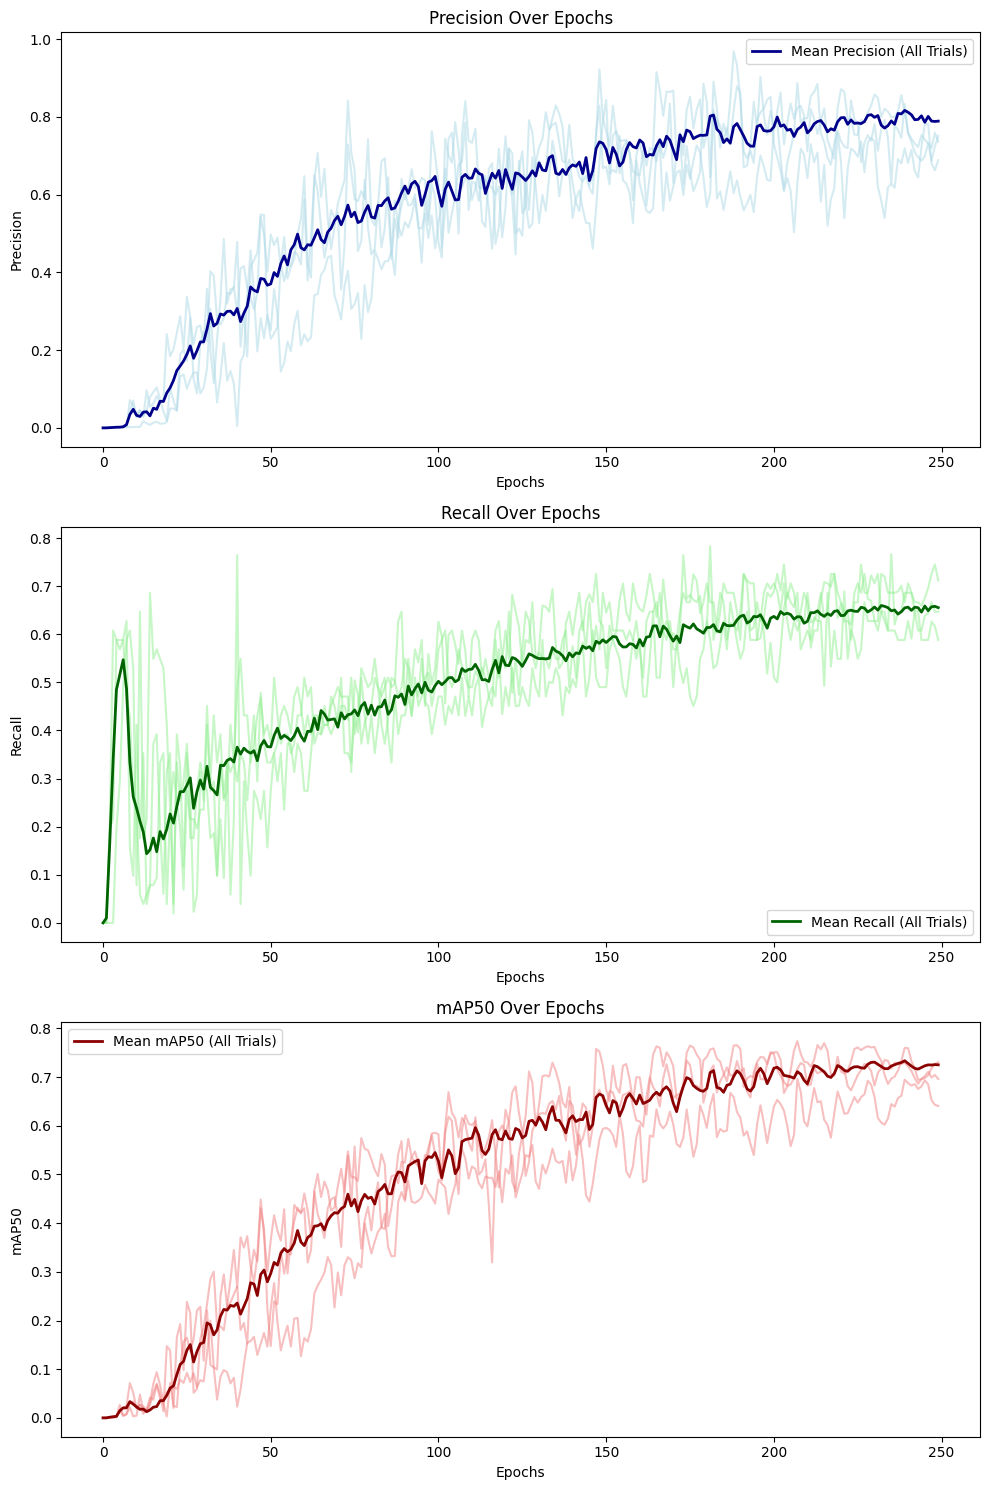

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

def clean_column_names(df):
    # Eliminar espacios en blanco al inicio y al final de los nombres de las columnas
    df.columns = df.columns.str.strip()
    return df

def plot_metrics_from_trials(base_directory, selected_trials):
    # Listar todas las carpetas de trials
    trial_folders = glob.glob(os.path.join(base_directory, 'trial_*'))

    # Inicializar listas para almacenar los datos de todas las métricas
    all_precision_data = []
    all_recall_data = []
    all_map50_data = []

    selected_precision_data = []
    selected_recall_data = []
    selected_map50_data = []

    # Recorrer cada carpeta de trial
    for i, folder in enumerate(trial_folders):
        results_file = os.path.join(folder, 'results.csv')
        if os.path.exists(results_file):
            # Leer el archivo CSV
            df = pd.read_csv(results_file)

            # Limpiar nombres de columnas
            df = clean_column_names(df)

            # Imprimir los nombres de las columnas para depuración
            print(f"Columnas en '{results_file}': {df.columns.tolist()}")

            # Intentar guardar las columnas de interés
            try:
                precision_values = df['metrics/precision(M)'].values
                recall_values = df['metrics/recall(M)'].values
                map50_values = df['metrics/mAP50(M)'].values

                # Guardar datos de todos los trials
                all_precision_data.append(precision_values)
                all_recall_data.append(recall_values)
                all_map50_data.append(map50_values)

                # Guardar datos solo de los trials seleccionados
                if (i + 1) in selected_trials:
                    selected_precision_data.append(precision_values)
                    selected_recall_data.append(recall_values)
                    selected_map50_data.append(map50_values)

            except KeyError as e:
                print(f"Columna no encontrada: {e}")

    # Convertir listas a DataFrames para facilitar el cálculo de la media
    all_precision_df = pd.DataFrame(all_precision_data).transpose()
    all_recall_df = pd.DataFrame(all_recall_data).transpose()
    all_map50_df = pd.DataFrame(all_map50_data).transpose()

    selected_precision_df = pd.DataFrame(selected_precision_data).transpose()
    selected_recall_df = pd.DataFrame(selected_recall_data).transpose()
    selected_map50_df = pd.DataFrame(selected_map50_data).transpose()

    # Calcular las medias para todos los trials
    precision_mean = all_precision_df.mean(axis=1)
    recall_mean = all_recall_df.mean(axis=1)
    map50_mean = all_map50_df.mean(axis=1)

    # Plotear las métricas
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plot Precision para los trials seleccionados
    for trial_data in selected_precision_data:
        axs[0].plot(trial_data, color='lightblue', alpha=0.5)
    axs[0].plot(precision_mean, color='darkblue', label='Mean Precision (All Trials)', linewidth=2)
    axs[0].set_title('Precision Over Epochs')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Precision')
    axs[0].legend()

    # Plot Recall para los trials seleccionados
    for trial_data in selected_recall_data:
        axs[1].plot(trial_data, color='lightgreen', alpha=0.5)
    axs[1].plot(recall_mean, color='darkgreen', label='Mean Recall (All Trials)', linewidth=2)
    axs[1].set_title('Recall Over Epochs')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Recall')
    axs[1].legend()

    # Plot mAP50 para los trials seleccionados
    for trial_data in selected_map50_data:
        axs[2].plot(trial_data, color='lightcoral', alpha=0.5)
    axs[2].plot(map50_mean, color='darkred', label='Mean mAP50 (All Trials)', linewidth=2)
    axs[2].set_title('mAP50 Over Epochs')
    axs[2].set_xlabel('Epochs')
    axs[2].set_ylabel('mAP50')
    axs[2].legend()

    # Ajustar el espaciado
    plt.tight_layout()
    plt.show()

# Uso de la función
base_directory = '/content/models/YoloV8_250Epoch_V1'
selected_trials = [5, 15, 1]
plot_metrics_from_trials(base_directory, selected_trials)


Columnas en '/content/models/YoloV8_250Epoch_V1/trial_37/results.csv': ['epoch', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)', 'val/box_loss', 'val/seg_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
Columnas en '/content/models/YoloV8_250Epoch_V1/trial_28/results.csv': ['epoch', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)', 'val/box_loss', 'val/seg_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
Columnas en '/content/models/YoloV8_250Epoch_V1/trial_9/results.csv': ['epoch', 'train/box_loss', 'train/seg_loss', 'train/cls_loss', 'train/dfl_loss', 'm

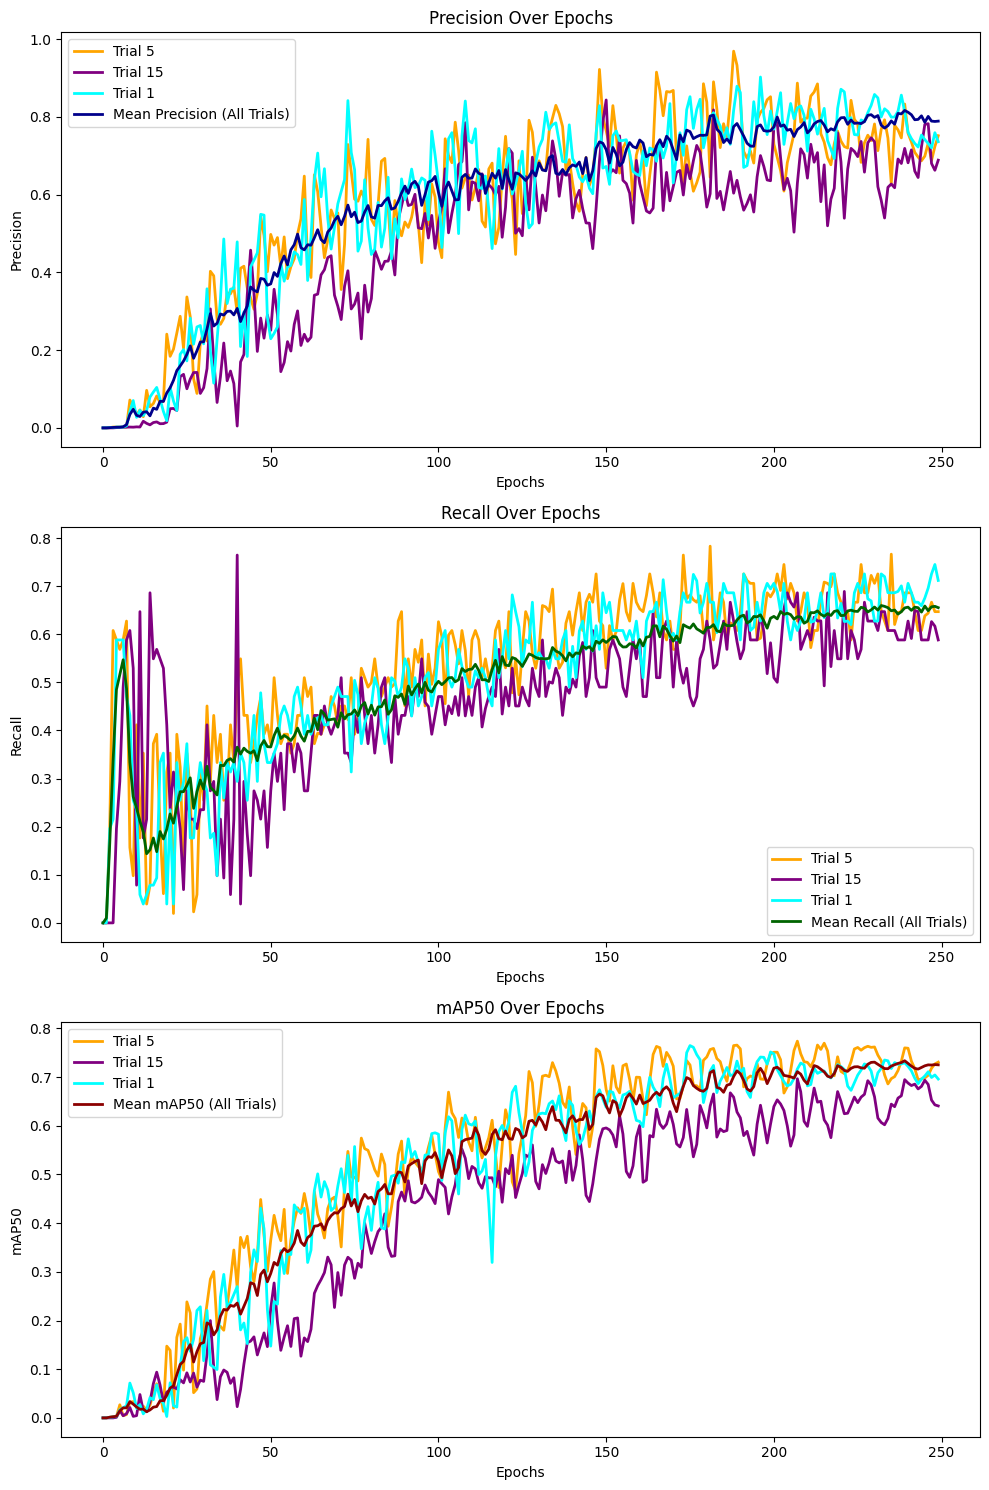

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

def clean_column_names(df):
    # Eliminar espacios en blanco al inicio y al final de los nombres de las columnas
    df.columns = df.columns.str.strip()
    return df

def plot_metrics_from_trials(base_directory, selected_trials):
    # Listar todas las carpetas de trials
    trial_folders = glob.glob(os.path.join(base_directory, 'trial_*'))

    # Inicializar listas para almacenar los datos de todas las métricas
    all_precision_data = []
    all_recall_data = []
    all_map50_data = []

    selected_precision_data = []
    selected_recall_data = []
    selected_map50_data = []

    # Recorrer cada carpeta de trial
    for i, folder in enumerate(trial_folders):
        results_file = os.path.join(folder, 'results.csv')
        if os.path.exists(results_file):
            # Leer el archivo CSV
            df = pd.read_csv(results_file)

            # Limpiar nombres de columnas
            df = clean_column_names(df)

            # Imprimir los nombres de las columnas para depuración
            print(f"Columnas en '{results_file}': {df.columns.tolist()}")

            # Intentar guardar las columnas de interés
            try:
                precision_values = df['metrics/precision(M)'].values
                recall_values = df['metrics/recall(M)'].values
                map50_values = df['metrics/mAP50(M)'].values

                # Guardar datos de todos los trials
                all_precision_data.append(precision_values)
                all_recall_data.append(recall_values)
                all_map50_data.append(map50_values)

                # Guardar datos solo de los trials seleccionados
                if (i + 1) in selected_trials:
                    selected_precision_data.append(precision_values)
                    selected_recall_data.append(recall_values)
                    selected_map50_data.append(map50_values)

            except KeyError as e:
                print(f"Columna no encontrada: {e}")

    # Convertir listas a DataFrames para facilitar el cálculo de la media
    all_precision_df = pd.DataFrame(all_precision_data).transpose()
    all_recall_df = pd.DataFrame(all_recall_data).transpose()
    all_map50_df = pd.DataFrame(all_map50_data).transpose()

    selected_precision_df = pd.DataFrame(selected_precision_data).transpose()
    selected_recall_df = pd.DataFrame(selected_recall_data).transpose()
    selected_map50_df = pd.DataFrame(selected_map50_data).transpose()

    # Calcular las medias para todos los trials
    precision_mean = all_precision_df.mean(axis=1)
    recall_mean = all_recall_df.mean(axis=1)
    map50_mean = all_map50_df.mean(axis=1)

    # Plotear las métricas
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Colores para los trials seleccionados
    selected_colors = ['orange', 'purple', 'cyan']

    # Plot Precision para los trials seleccionados
    for idx, trial_data in enumerate(selected_precision_data):
        axs[0].plot(trial_data, color=selected_colors[idx], label=f'Trial {selected_trials[idx]}', linewidth=2)
    axs[0].plot(precision_mean, color='darkblue', label='Mean Precision (All Trials)', linewidth=2)
    axs[0].set_title('Precision Over Epochs')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Precision')
    axs[0].legend()

    # Plot Recall para los trials seleccionados
    for idx, trial_data in enumerate(selected_recall_data):
        axs[1].plot(trial_data, color=selected_colors[idx], label=f'Trial {selected_trials[idx]}', linewidth=2)
    axs[1].plot(recall_mean, color='darkgreen', label='Mean Recall (All Trials)', linewidth=2)
    axs[1].set_title('Recall Over Epochs')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Recall')
    axs[1].legend()

    # Plot mAP50 para los trials seleccionados
    for idx, trial_data in enumerate(selected_map50_data):
        axs[2].plot(trial_data, color=selected_colors[idx], label=f'Trial {selected_trials[idx]}', linewidth=2)
    axs[2].plot(map50_mean, color='darkred', label='Mean mAP50 (All Trials)', linewidth=2)
    axs[2].set_title('mAP50 Over Epochs')
    axs[2].set_xlabel('Epochs')
    axs[2].set_ylabel('mAP50')
    axs[2].legend()

    # Ajustar el espaciado
    plt.tight_layout()
    plt.show()

# Uso de la función
base_directory = '/content/models/YoloV8_250Epoch_V1'
selected_trials = [5, 15, 1]
plot_metrics_from_trials(base_directory, selected_trials)


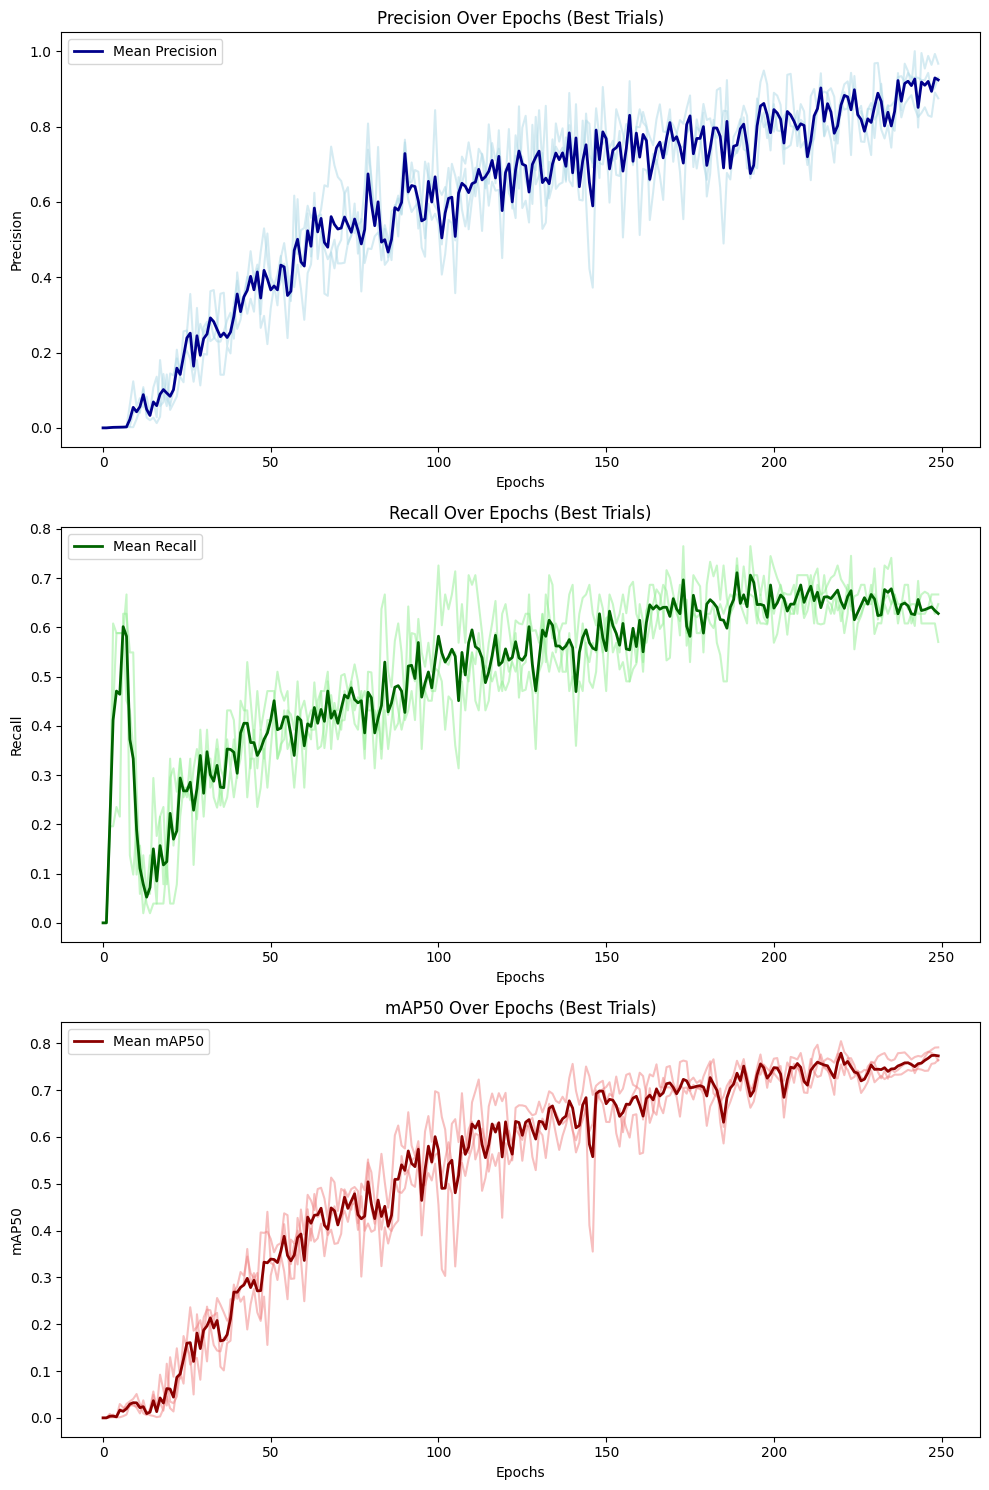

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

def clean_column_names(df):
    # Eliminar espacios en blanco al inicio y al final de los nombres de las columnas
    df.columns = df.columns.str.strip()
    return df

def plot_best_trials_metrics(base_directory, best_trials):
    # Inicializar listas para almacenar los datos de las métricas
    precision_data = []
    recall_data = []
    map50_data = []

    # Recorrer los mejores trials
    for trial_number in best_trials:
        trial_folder = os.path.join(base_directory, f'trial_{trial_number}')
        results_file = os.path.join(trial_folder, 'results.csv')
        if os.path.exists(results_file):
            # Leer el archivo CSV
            df = pd.read_csv(results_file)

            # Limpiar nombres de columnas
            df = clean_column_names(df)

            # Guardar las columnas de interés
            precision_data.append(df['metrics/precision(M)'].values)
            recall_data.append(df['metrics/recall(M)'].values)
            map50_data.append(df['metrics/mAP50(M)'].values)

    # Convertir listas a DataFrames para facilitar el cálculo de la media
    precision_df = pd.DataFrame(precision_data).transpose()
    recall_df = pd.DataFrame(recall_data).transpose()
    map50_df = pd.DataFrame(map50_data).transpose()

    # Calcular las medias
    precision_mean = precision_df.mean(axis=1)
    recall_mean = recall_df.mean(axis=1)
    map50_mean = map50_df.mean(axis=1)

    # Plotear las métricas
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plot Precision
    for trial_data in precision_data:
        axs[0].plot(trial_data, color='lightblue', alpha=0.5)
    axs[0].plot(precision_mean, color='darkblue', label='Mean Precision', linewidth=2)
    axs[0].set_title('Precision Over Epochs (Best Trials)')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Precision')
    axs[0].legend()

    # Plot Recall
    for trial_data in recall_data:
        axs[1].plot(trial_data, color='lightgreen', alpha=0.5)
    axs[1].plot(recall_mean, color='darkgreen', label='Mean Recall', linewidth=2)
    axs[1].set_title('Recall Over Epochs (Best Trials)')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Recall')
    axs[1].legend()

    # Plot mAP50
    for trial_data in map50_data:
        axs[2].plot(trial_data, color='lightcoral', alpha=0.5)
    axs[2].plot(map50_mean, color='darkred', label='Mean mAP50', linewidth=2)
    axs[2].set_title('mAP50 Over Epochs (Best Trials)')
    axs[2].set_xlabel('Epochs')
    axs[2].set_ylabel('mAP50')
    axs[2].legend()

    # Ajustar el espaciado
    plt.tight_layout()
    plt.show()

# Usar la función con los 3 mejores trials
base_directory = '/content/models/YoloV8_250Epoch_V1'
# Supongamos que has calculado los mejores 3 trials previamente
best_3_trials = [5, 15, 1]  # Reemplaza con los números reales de los mejores trials

plot_best_trials_metrics(base_directory, best_3_trials)

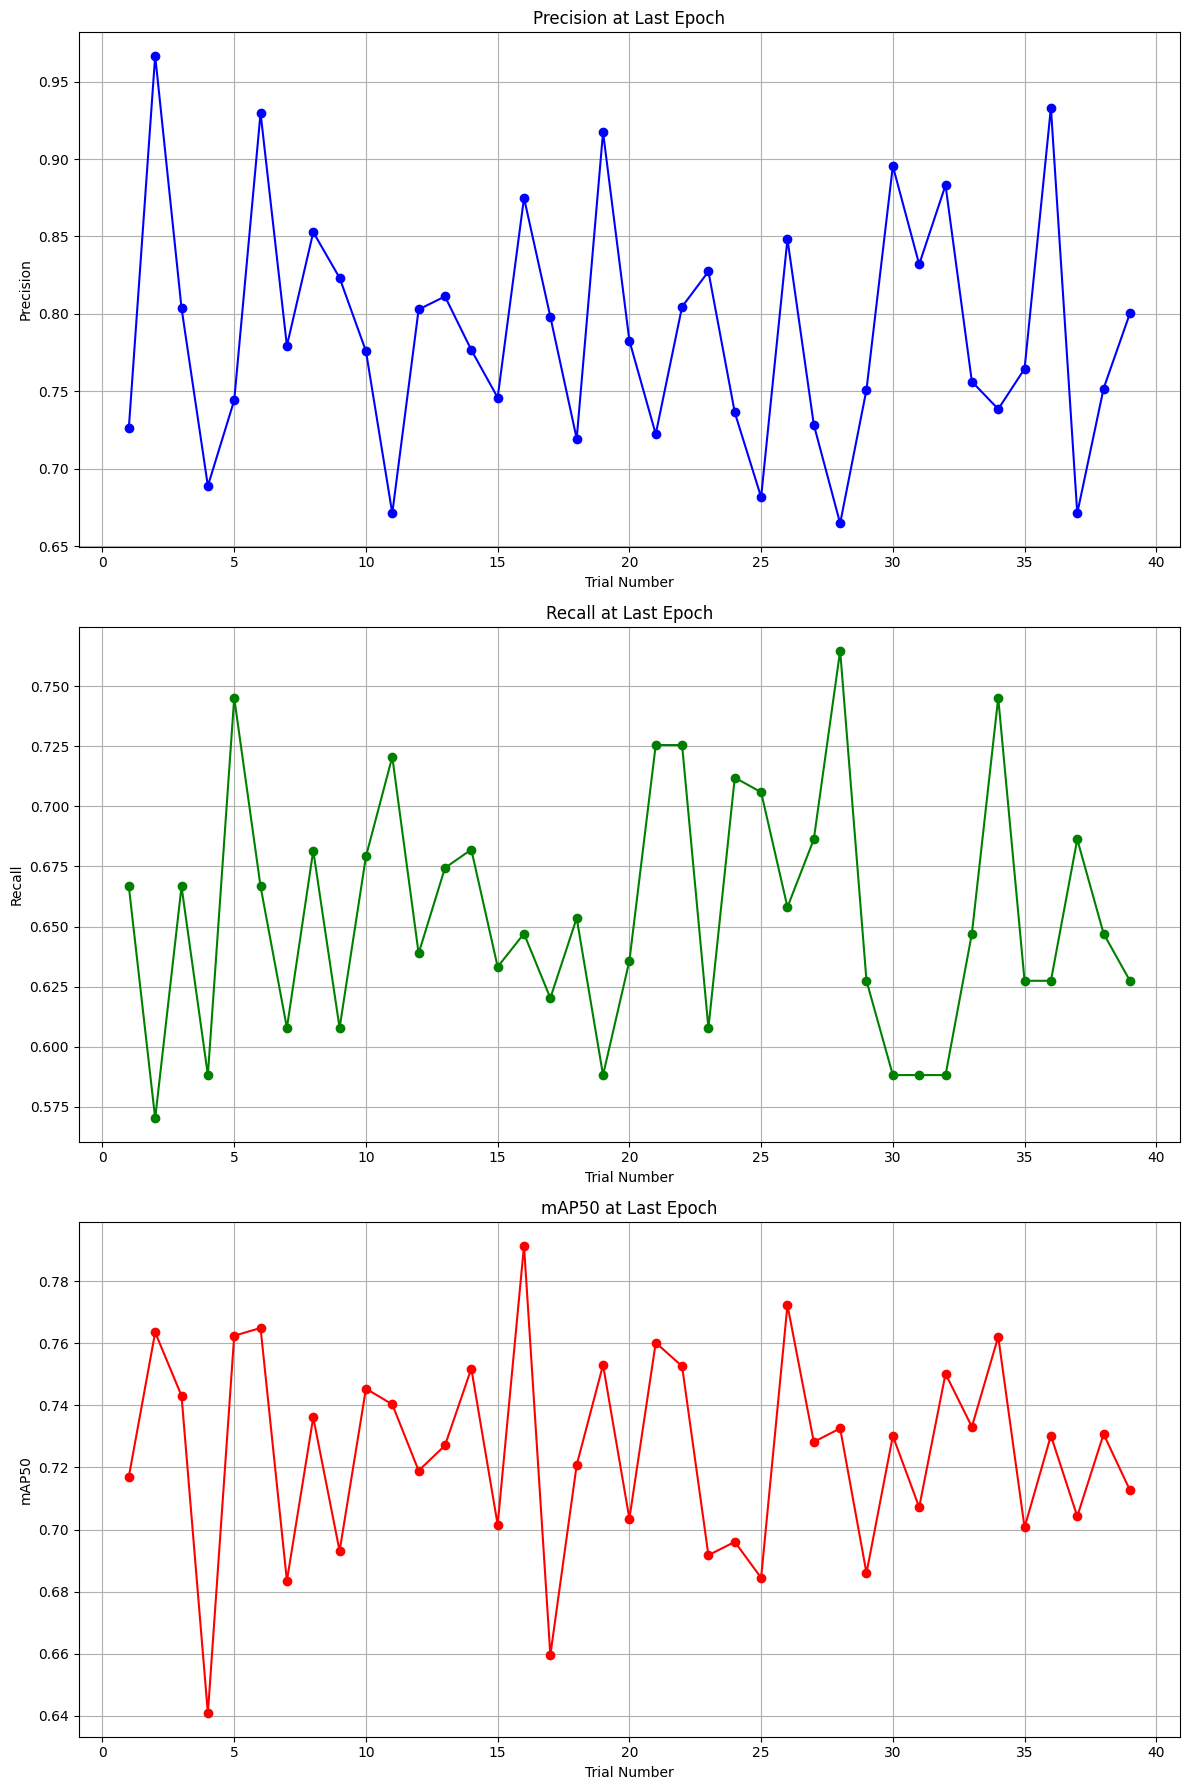

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

def clean_column_names(df):
    # Eliminar espacios en blanco al inicio y al final de los nombres de las columnas
    df.columns = df.columns.str.strip()
    return df

def plot_last_epoch_values(base_directory):
    # Listar todas las carpetas de trials
    trial_folders = sorted(glob.glob(os.path.join(base_directory, 'trial_*')), key=lambda x: int(os.path.basename(x).split('_')[1]))

    # Inicializar listas para almacenar los datos del último epoch
    all_precision_last_epoch = []
    all_recall_last_epoch = []
    all_map50_last_epoch = []

    # Recorrer cada carpeta de trial
    for folder in trial_folders:
        trial_number = int(os.path.basename(folder).split('_')[1])
        results_file = os.path.join(folder, 'results.csv')
        if os.path.exists(results_file):
            # Leer el archivo CSV
            df = pd.read_csv(results_file)

            # Limpiar nombres de columnas
            df = clean_column_names(df)

            # Obtener el último epoch
            last_epoch = df.iloc[-1]

            # Extraer las métricas del último epoch
            precision = last_epoch.get('metrics/precision(M)', None)
            recall = last_epoch.get('metrics/recall(M)', None)
            map50 = last_epoch.get('metrics/mAP50(M)', None)

            # Agregar datos a las listas
            all_precision_last_epoch.append(precision)
            all_recall_last_epoch.append(recall)
            all_map50_last_epoch.append(map50)

    # Graficar las métricas del último epoch
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))

    # Plot Precision
    axs[0].plot(range(1, len(all_precision_last_epoch) + 1), all_precision_last_epoch, marker='o', linestyle='-', color='blue')
    axs[0].set_title('Precision at Last Epoch')
    axs[0].set_xlabel('Trial Number')
    axs[0].set_ylabel('Precision')
    axs[0].grid(True)

    # Plot Recall
    axs[1].plot(range(1, len(all_recall_last_epoch) + 1), all_recall_last_epoch, marker='o', linestyle='-', color='green')
    axs[1].set_title('Recall at Last Epoch')
    axs[1].set_xlabel('Trial Number')
    axs[1].set_ylabel('Recall')
    axs[1].grid(True)

    # Plot mAP50
    axs[2].plot(range(1, len(all_map50_last_epoch) + 1), all_map50_last_epoch, marker='o', linestyle='-', color='red')
    axs[2].set_title('mAP50 at Last Epoch')
    axs[2].set_xlabel('Trial Number')
    axs[2].set_ylabel('mAP50')
    axs[2].grid(True)

    # Ajustar el espaciado
    plt.tight_layout()
    plt.show()

# Ejecutar la función para graficar los valores del último epoch
base_directory = '/content/models/YoloV8_250Epoch_V1'
plot_last_epoch_values(base_directory)


# Predicción



0: 640x640 1 Polipo, 549.8ms
Speed: 11.4ms preprocess, 549.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


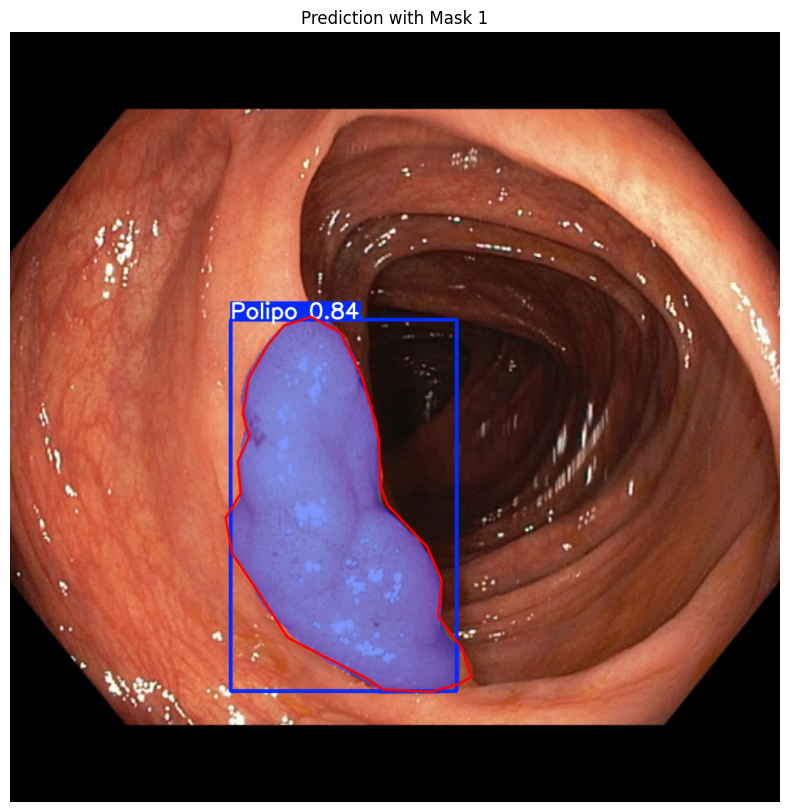


0: 640x640 1 Polipo, 361.5ms
Speed: 7.2ms preprocess, 361.5ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


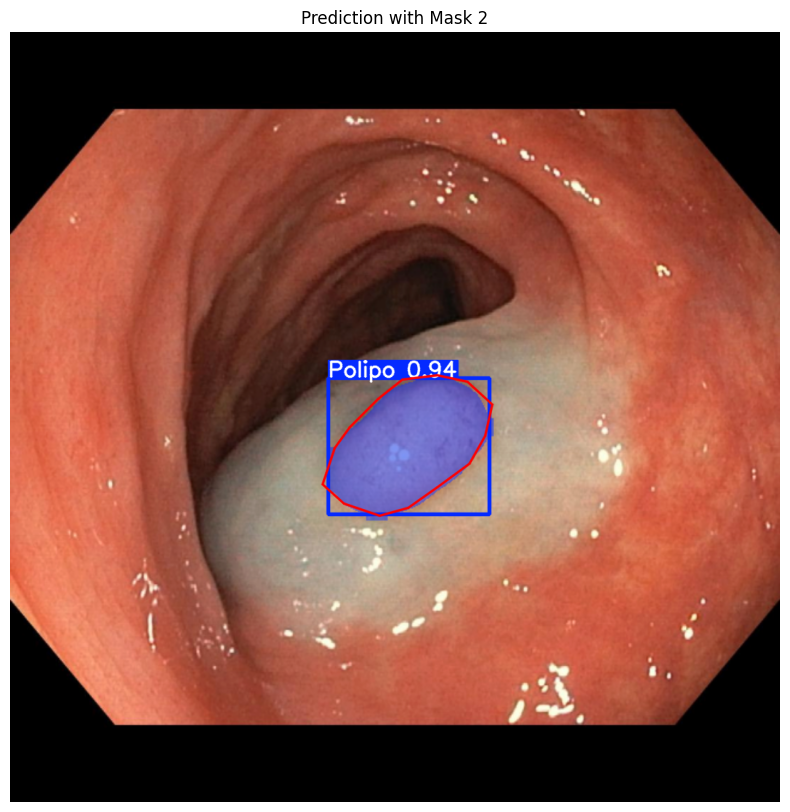


0: 640x640 1 Polipo, 350.6ms
Speed: 6.1ms preprocess, 350.6ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


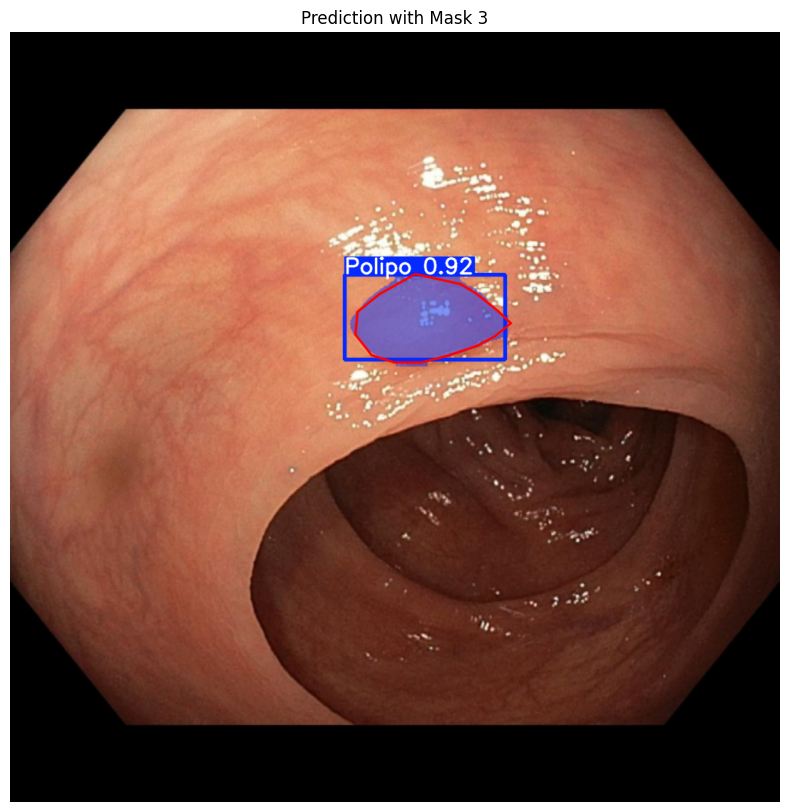


0: 640x640 2 Polipos, 431.9ms
Speed: 6.8ms preprocess, 431.9ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)


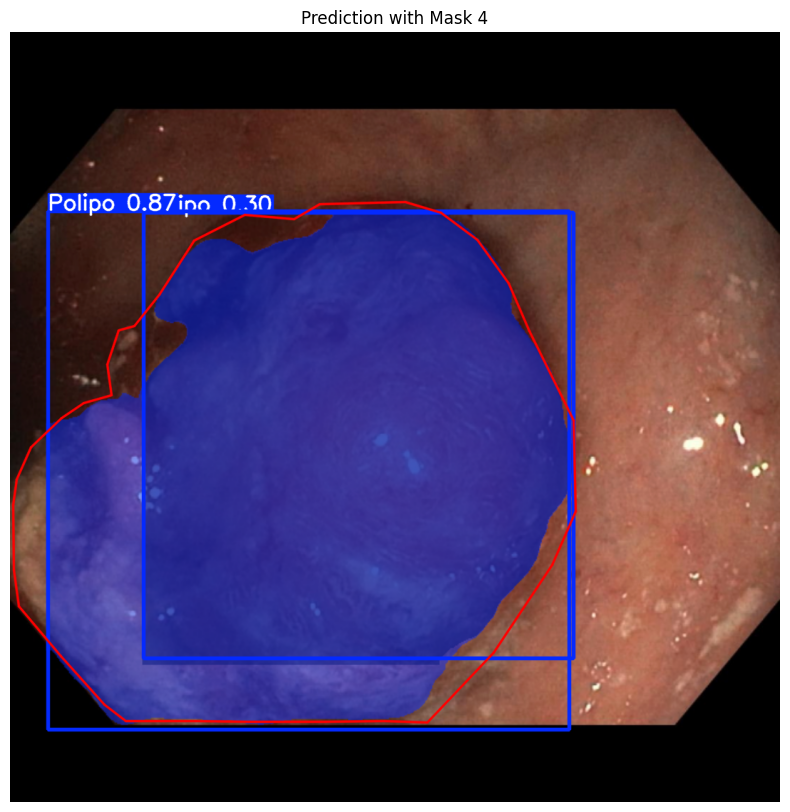


0: 640x640 1 Polipo, 413.4ms
Speed: 11.9ms preprocess, 413.4ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)


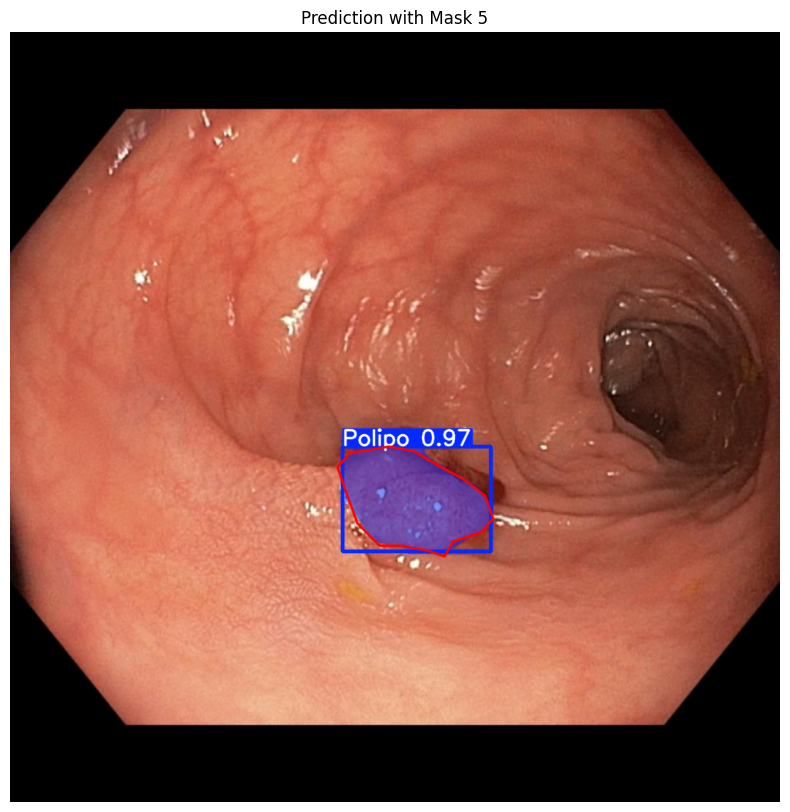

In [28]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2  # Asegúrate de que OpenCV esté importado

# Cargar un modelo preentrenado de YOLOv8 para segmentación
model = YOLO('/content/models/YoloV8_250Epoch_V1/trial_5/weights/best.pt')

# Rutas a las carpetas de imágenes y etiquetas
image_folder = '/content/drive/MyDrive/TFM/Sin duplicados/Only_Preprocessing/test/images'
label_folder = '/content/drive/MyDrive/TFM/Sin duplicados/Only_Preprocessing/test/labels'

# Listar todas las imágenes en la carpeta
image_files = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Seleccionar 5 imágenes para mostrar (o las primeras 5)
selected_images = image_files[:5]

def draw_mask_on_image(image, label_path):
    # Leer las etiquetas del archivo de ground truth
    with open(label_path, 'r') as f:
        labels = f.read().splitlines()

    # Convertir la imagen a un array numpy
    image_np = np.array(image)

    h, w = image_np.shape[:2]

    for label in labels:
        parts = label.split(' ')
        class_id = parts[0]
        poly = parts[1:]

        if len(poly) % 2 != 0:
            poly = poly[:-1]  # Eliminar el último elemento para hacer el número de coordenadas par

        poly = np.asarray(poly, dtype=np.float32).reshape(-1, 2)  # Leer y redimensionar poly
        poly *= [w, h]  # Remuestrear

        # Dibujar el polígono como borde (hueco) sobre la imagen
        cv2.polylines(image_np, [poly.astype('int')], isClosed=True, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

    # Convertir la imagen de BGR a RGB para matplotlib
    image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

    return image_rgb

# Aplicar el modelo a cada una de las imágenes seleccionadas y mostrar los resultados
for i, img_path in enumerate(selected_images):
    # Cargar la imagen
    img = Image.open(img_path).convert('RGB')  # Asegurarse de que la imagen esté en formato RGB

    # Hacer la predicción
    results = model(img)

    # Obtener la imagen con las predicciones dibujadas
    result_image = results[0].plot()

    # Convertir la imagen a formato RGB si es necesario
    result_image_rgb = np.array(result_image)

    # Obtener el nombre base del archivo de imagen (sin la extensión)
    base_name = os.path.basename(img_path).split('.')[0]

    # Construir la ruta del archivo de etiqueta correspondiente
    label_path = os.path.join(label_folder, f"{base_name}.txt")

    # Convertir la imagen de resultados a PIL para pasarla a la función de máscara
    result_image_pil = Image.fromarray(result_image_rgb)

    # Dibujar la máscara de la etiqueta sobre la imagen de resultados
    result_image_with_mask = draw_mask_on_image(result_image_pil, label_path)

    # Mostrar la imagen con las predicciones y la máscara usando matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(result_image_with_mask)
    plt.title(f'Prediction with Mask {i+1}')
    plt.axis('off')
    plt.show()
